In [1]:
# This notebook is to make code to remove unstable branch of the MR curve. This is when the mass
# is decreasing when the density is increasing.

import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate
import scipy.interpolate
import numpy as np
import scipy.stats as sts
import test_TOVsolver

In [2]:
# we will test this on the 1k sim I ran already

M_1k = np.loadtxt("../data/MRL1ksim_cs_M.dat")
R_1k = np.loadtxt("../data/MRL1ksim_cs_R.dat")
L_1k = np.loadtxt("../data/MRL1ksim_cs_L.dat")

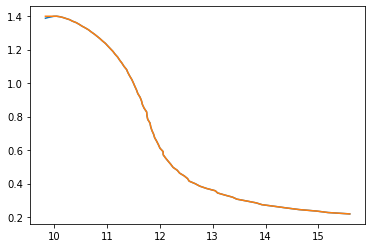

In [17]:
# pick which sim
j = 200

# define size
MRL_size = M_1k.shape[0]

# initialize array for corrected mass values
cor_M = np.zeros(MRL_size)
cor_M[0] = M_1k[0,j]

for i in range(MRL_size-1):
    if M_1k[i+1,j] > M_1k[i,j]:
        cor_M[i+1] = M_1k[i+1,j]
    if M_1k[i+1,j] <= M_1k[i,j]:
        cor_M[i+1] = cor_M[i]
        
plt.plot(R_1k[:,j], M_1k[:,j])
plt.plot(R_1k[:,j], cor_M)

In [23]:
def remove_unstable(mass):
    # define size
    size = mass.shape[0]

    # initialize array for corrected mass values
    cor_M = np.zeros(size)
    cor_M[0] = mass[0]

    for i in range(size-1):
        if mass[i+1] > mass[i]:
            cor_M[i+1] = mass[i+1]
        if mass[i+1] <= mass[i]:
            cor_M[i+1] = cor_M[i]
            
    return cor_M

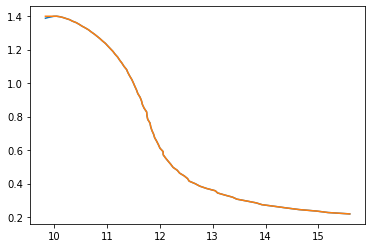

In [24]:
k = 200
mass = M_1k[:,k]
cor_mass = remove_unstable(mass)

plt.plot(R_1k[:,j], mass)
plt.plot(R_1k[:,j], cor_mass)